<a href="https://colab.research.google.com/github/dazed-n-razed/CSE327-PROJECT-GROUP-10/blob/main/BOSTON_PRICING_BY_SHAHRIARRATUL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys, os, tarfile, urllib.request
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Visualization Dependencies
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc("axes", labelsize=14)
mpl.rc("xtick", labelsize=12)
mpl.rc("ytick", labelsize=12)

PROJECT_ROOT_DIR = "."
ID = "Boston Housing"
IMAGE_PATH = os.path.join(PROJECT_ROOT_DIR, "Images", ID)
if not os.path.isdir(IMAGE_PATH):
    os.makedirs(IMAGE_PATH)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGE_PATH, fig_id + "." + fig_extension)
    print("Saving Figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignoring the Warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal")
import IPython

In [ ]:
# Data URL for Boston Housing dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"

# Reading the raw dataset and skipping the first 22 rows to get data
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# Preparing the data by splitting values
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Converting to a DataFrame
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
housing = pd.DataFrame(data, columns=columns)

# Adding target as the price column
housing['PRICE'] = target

# Inspecting the first 7 rows
housing.head(7)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Saving Figure Boston_Histogram_Plots


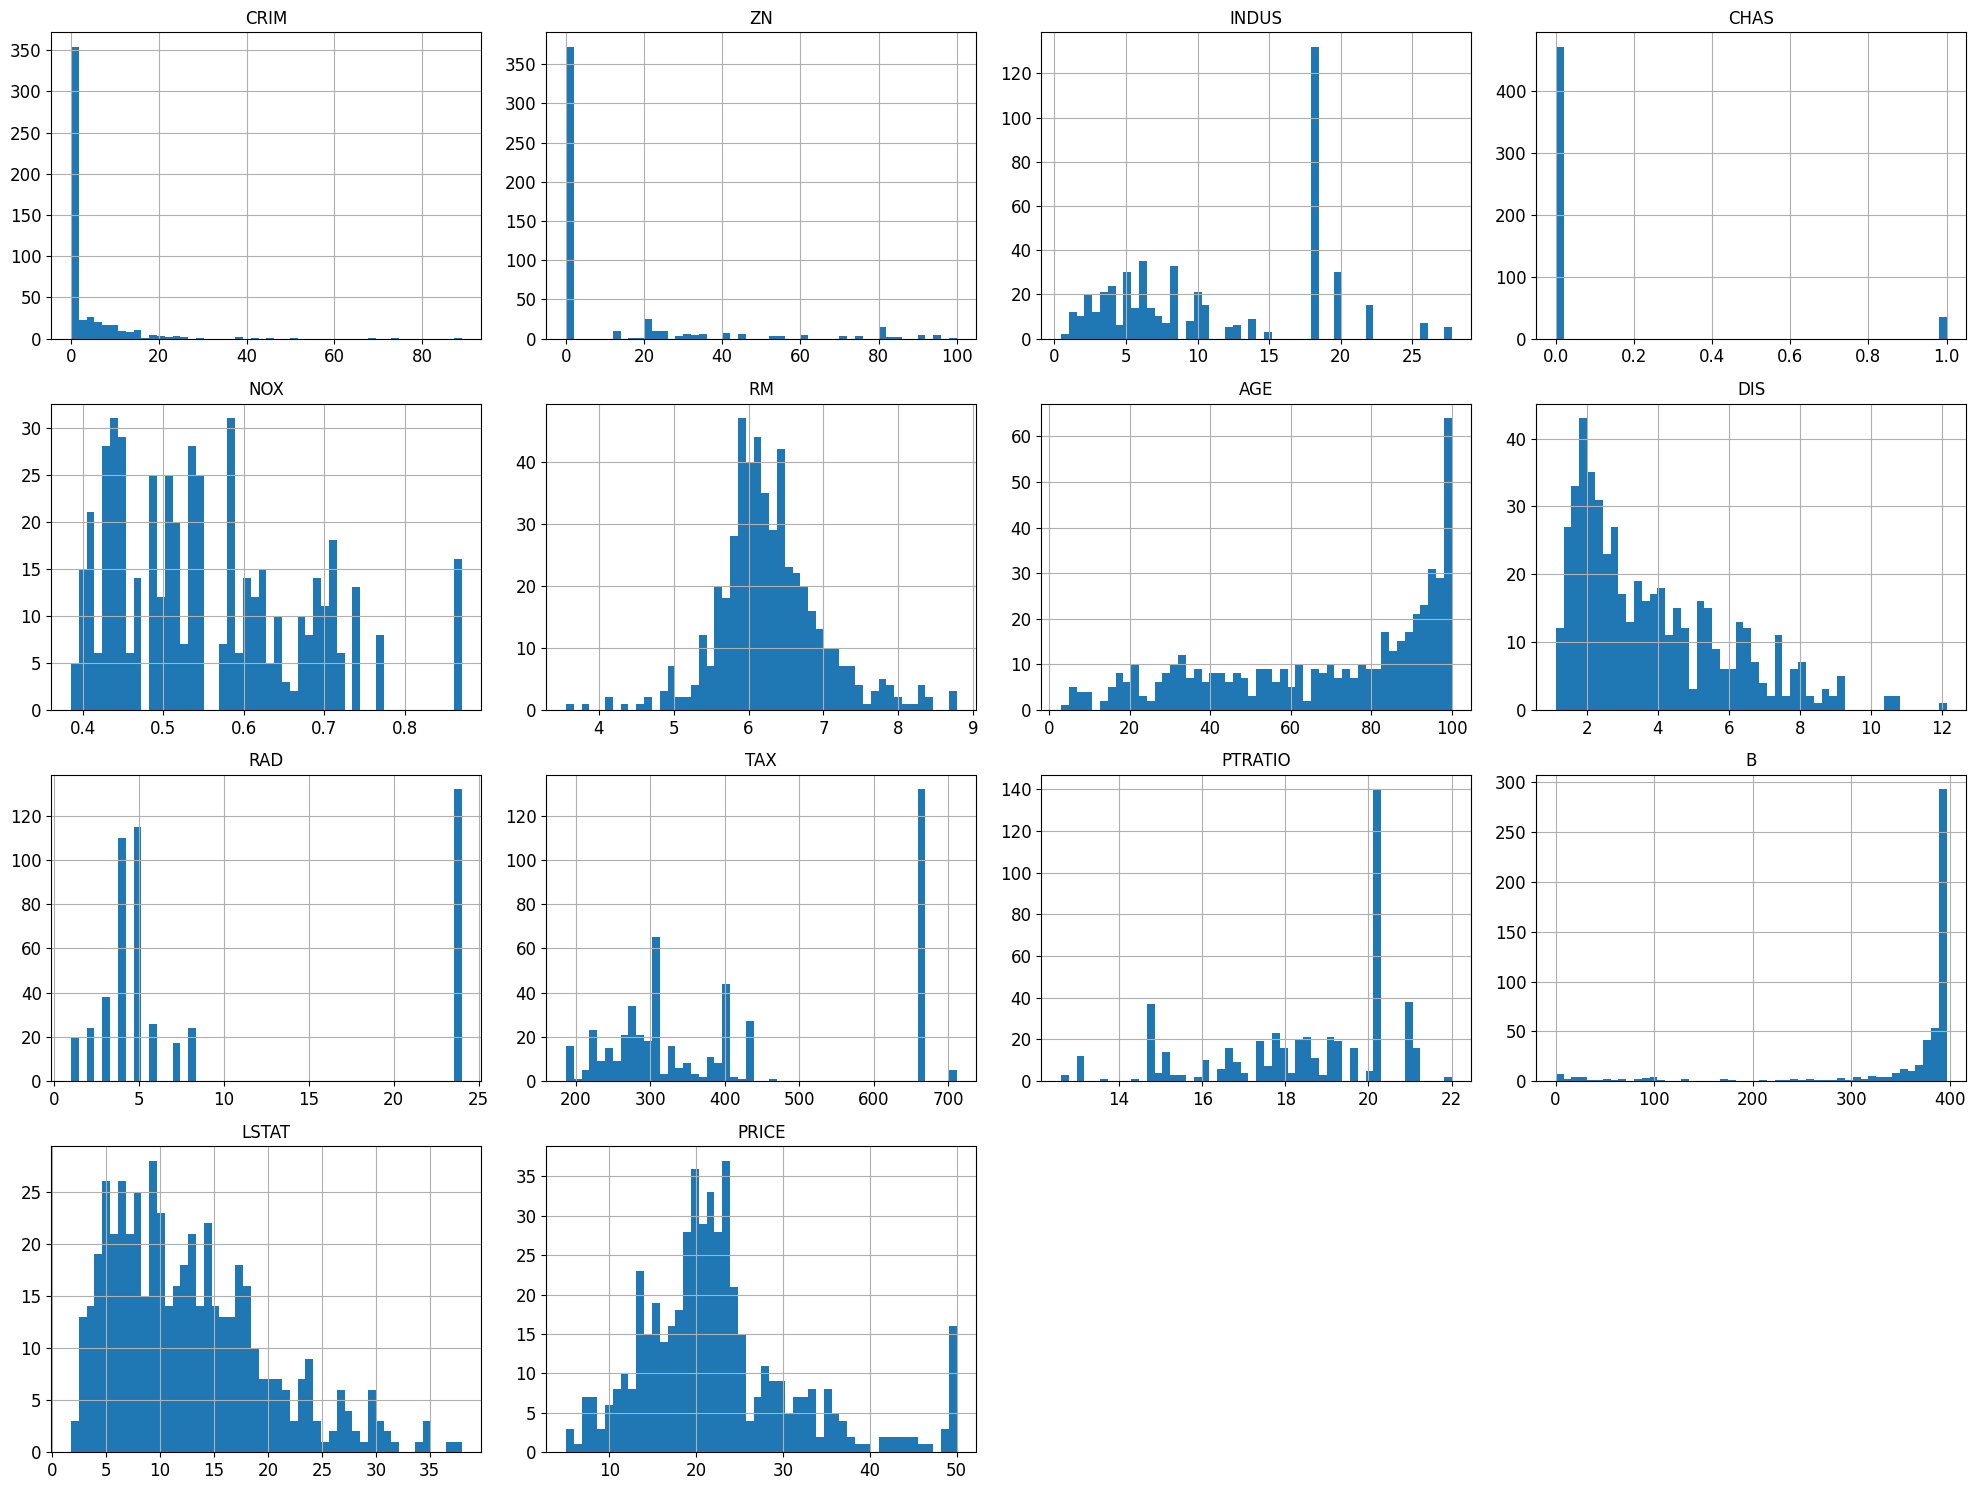

In [ ]:
# Commented out IPython magic to ensure Python compatibility.
# Inspecting the Data using Histograms for Boston Housing dataset
# %matplotlib inline
import matplotlib.pyplot as plt

# Assuming 'housing' is the DataFrame holding the Boston dataset
housing.hist(bins=50, figsize=(20, 15))
save_fig("Boston_Histogram_Plots")
plt.show()


In [ ]:
# Splitting the Dataset for Boston Housing
from sklearn.model_selection import train_test_split

# Assuming 'housing' is the DataFrame holding the Boston dataset
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=11)

# Inspecting the Dataset
print(f"Training set: {len(train_set)}")                                             # Number of Training Dataset.
print(f"\nTesting set: {len(test_set)}")                                             # Number of Testing Dataset.
IPython.display.display(train_set.head(3))  # Displaying first 3 rows of training set
print("\n")
IPython.display.display(test_set.head(3))  # Displaying first 3 rows of testing set

Training set: 404

Testing set: 102


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
188,0.12579,45.0,3.44,0.0,0.437,6.556,29.1,4.5667,5.0,398.0,15.2,382.84,4.56,29.8
319,0.47547,0.0,9.90,0.0,0.544,6.113,58.8,4.0019,4.0,304.0,18.4,396.23,12.73,21.0
21,0.85204,0.0,8.14,0.0,0.538,5.965,89.2,4.0123,4.0,307.0,21.0,392.53,13.83,19.6


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
53,0.04981,21.0,5.64,0.0,0.439,5.998,21.4,6.8147,4.0,243.0,16.8,396.90,8.43,23.4
490,0.20746,0.0,27.74,0.0,0.609,5.093,98.0,1.8226,4.0,711.0,20.1,318.43,29.68,8.1
240,0.11329,30.0,4.93,0.0,0.428,6.897,54.3,6.3361,6.0,300.0,16.6,391.25,11.38,22.0


In [ ]:
print(housing.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE', 'income_cat'],
      dtype='object')


income_cat
2    157
3    125
4     88
5     74
1     62
Name: count, dtype: int64




<Axes: >

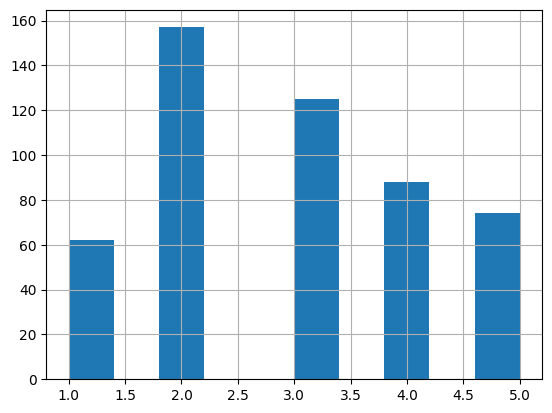

In [ ]:
# Creating the Income Categories based on LSTAT (percentage of lower status population)
housing["income_cat"] = pd.cut(housing["LSTAT"],
                               bins=[0., 5, 10, 15, 20, np.inf],
                               labels=[1, 2, 3, 4, 5])

# Inspecting the Income Categories
print(housing["income_cat"].value_counts())
print("\n")
housing["income_cat"].hist()

income_cat
2    157
3    125
4     88
5     74
1     62
Name: count, dtype: int64


income_cat
2    0.313725
3    0.245098
4    0.176471
5    0.147059
1    0.117647
Name: count, dtype: float64


income_cat
2    0.310277
3    0.247036
4    0.173913
5    0.146245
1    0.122530
Name: count, dtype: float64




,Overall,Stratified,Random,Random % Error,Stratified % Error
income_cat,,,,,
1,0.122530,0.117647,0.107843,-11.986085,-3.984820
2,0.310277,0.313725,0.333333,7.430998,1.111527
3,0.247036,0.245098,0.186275,-24.596078,-0.784314
4,0.173913,0.176471,0.176471,1.470588,1.470588
5,0.146245,0.147059,0.196078,34.075252,0.556439


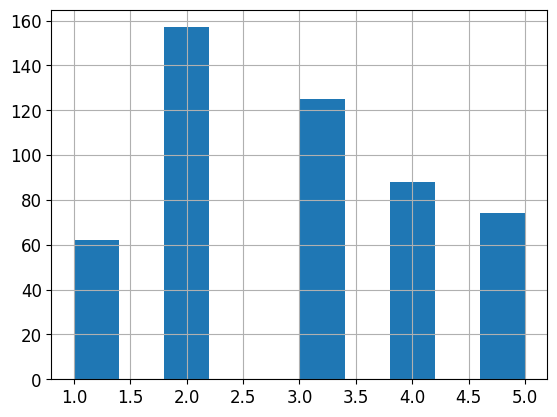

In [ ]:
#@ Creating the Income Categories based on LSTAT:
housing["income_cat"] = pd.cut(housing["LSTAT"],
                               bins=[0., 5, 10, 15, 20, np.inf],
                               labels=[1, 2, 3, 4, 5])

#@ Inspecting the Income Categories:
print(housing["income_cat"].value_counts())
print("\n")
housing["income_cat"].hist()

#@ Stratified Sampling based on Income Category:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=11)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

#@ Inspecting the Sampling:
print(strat_test_set["income_cat"].value_counts() / len(strat_test_set))  # Proportions in the stratified test set.
print("\n")
print(housing["income_cat"].value_counts() / len(housing))  # Proportions in the full dataset.

#@ Comparing the Proportions:
def income_cat_propotions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=11)  # Random split.
compare_props = pd.DataFrame({
    "Overall": income_cat_propotions(housing),
    "Stratified": income_cat_propotions(strat_test_set),
    "Random": income_cat_propotions(test_set)
}).sort_index()
compare_props["Random % Error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Stratified % Error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

print("\n")
IPython.display.display(compare_props)

In [ ]:
#@ Removing the income_cat column from both the stratified training and test sets for Boston Housing
for set_ in (strat_train_set, strat_test_set):
    if "income_cat" in set_.columns:  # Check if the column exists before dropping
        set_.drop("income_cat", axis=1, inplace=True)

Saving Figure RM_vs_PRICE


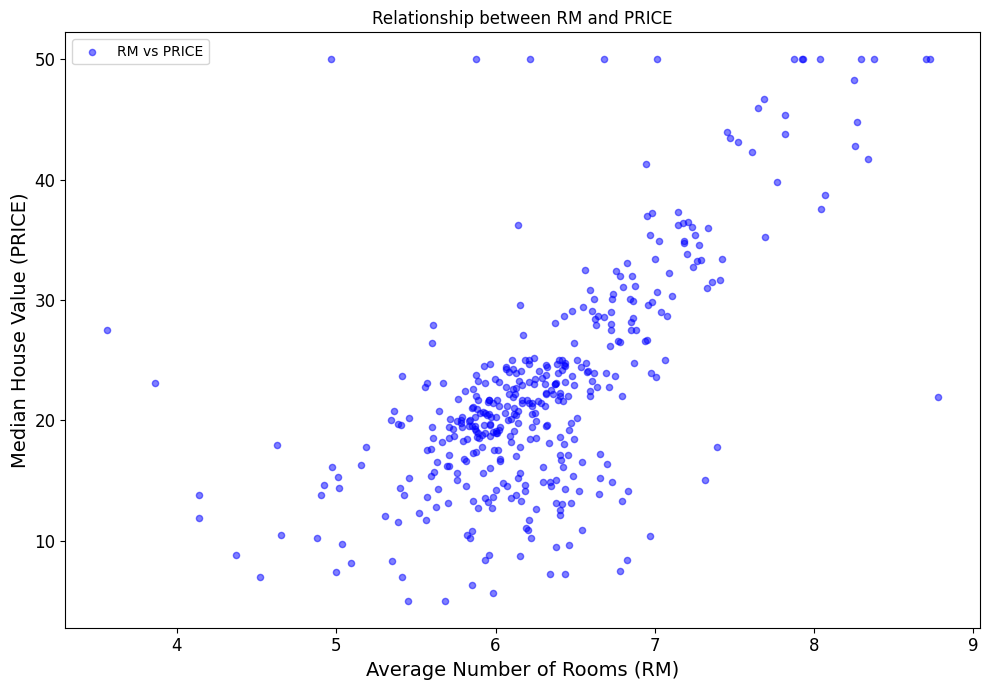

Saving Figure LSTAT_vs_PRICE


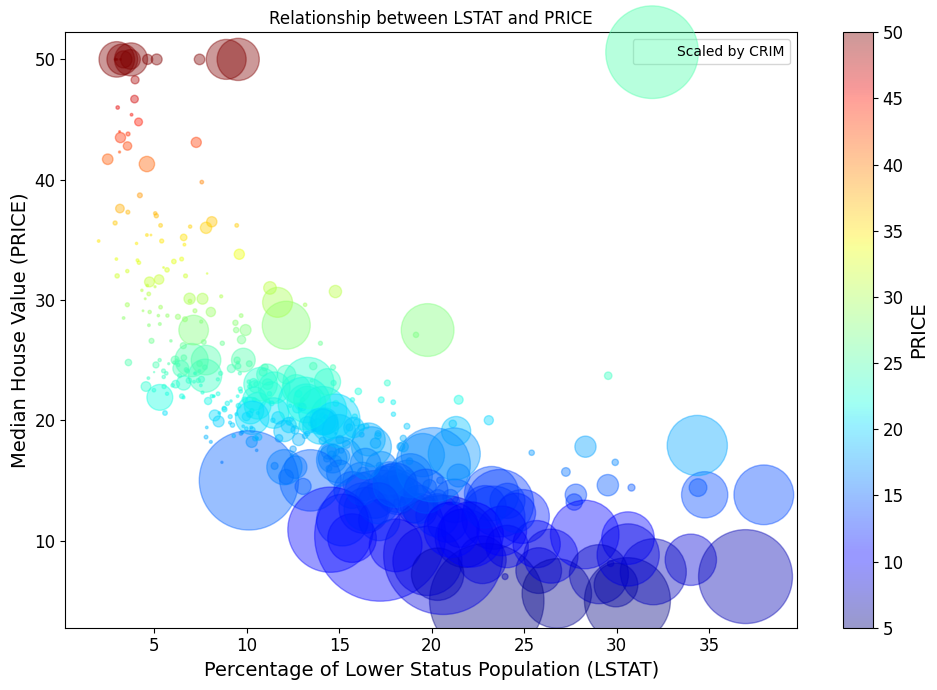

In [ ]:
#@ Creating the copy of the Training set:
housing_boston = strat_train_set.copy()

# Visualization 1: Relationship between RM and PRICE
housing_boston.plot(kind="scatter", x="RM", y="PRICE", alpha=0.5, figsize=(10, 7),
                     color="blue", label="RM vs PRICE")
plt.xlabel("Average Number of Rooms (RM)")
plt.ylabel("Median House Value (PRICE)")
plt.title("Relationship between RM and PRICE")
plt.legend()
save_fig("RM_vs_PRICE")
plt.show()

# Visualization 2: Relationship between LSTAT and PRICE
# Optionally, scale the marker size using CRIM (crime rate) for additional context.
housing_boston.plot(kind="scatter", x="LSTAT", y="PRICE", alpha=0.4,
                     s=housing_boston["CRIM"] * 100,  # scaling CRIM for marker size
                     label="Scaled by CRIM", figsize=(10, 7),
                     c="PRICE", cmap=plt.get_cmap("jet"), colorbar=True,
                     sharex=False)
plt.xlabel("Percentage of Lower Status Population (LSTAT)")
plt.ylabel("Median House Value (PRICE)")
plt.title("Relationship between LSTAT and PRICE")
plt.legend()
save_fig("LSTAT_vs_PRICE")
plt.show()

In [ ]:
# Checking the data types of the columns in the Boston dataset
print(housing.dtypes)

# Compute correlations with the target variable "PRICE" (or "MEDV")
corr_matrix = housing.corr()

# Display the correlation of each feature with the target variable
print(corr_matrix["PRICE"].sort_values(ascending=False))

CRIM           float64
ZN             float64
INDUS          float64
CHAS           float64
NOX            float64
RM             float64
AGE            float64
DIS            float64
RAD            float64
TAX            float64
PTRATIO        float64
B              float64
LSTAT          float64
PRICE          float64
income_cat    category
dtype: object
PRICE         1.000000
RM            0.695360
ZN            0.360445
B             0.333461
DIS           0.249929
CHAS          0.175260
AGE          -0.376955
RAD          -0.381626
CRIM         -0.388305
NOX          -0.427321
TAX          -0.468536
INDUS        -0.483725
PTRATIO      -0.507787
LSTAT        -0.737663
income_cat   -0.777009
Name: PRICE, dtype: float64


Saving Figure Boston_Housing_Correlations


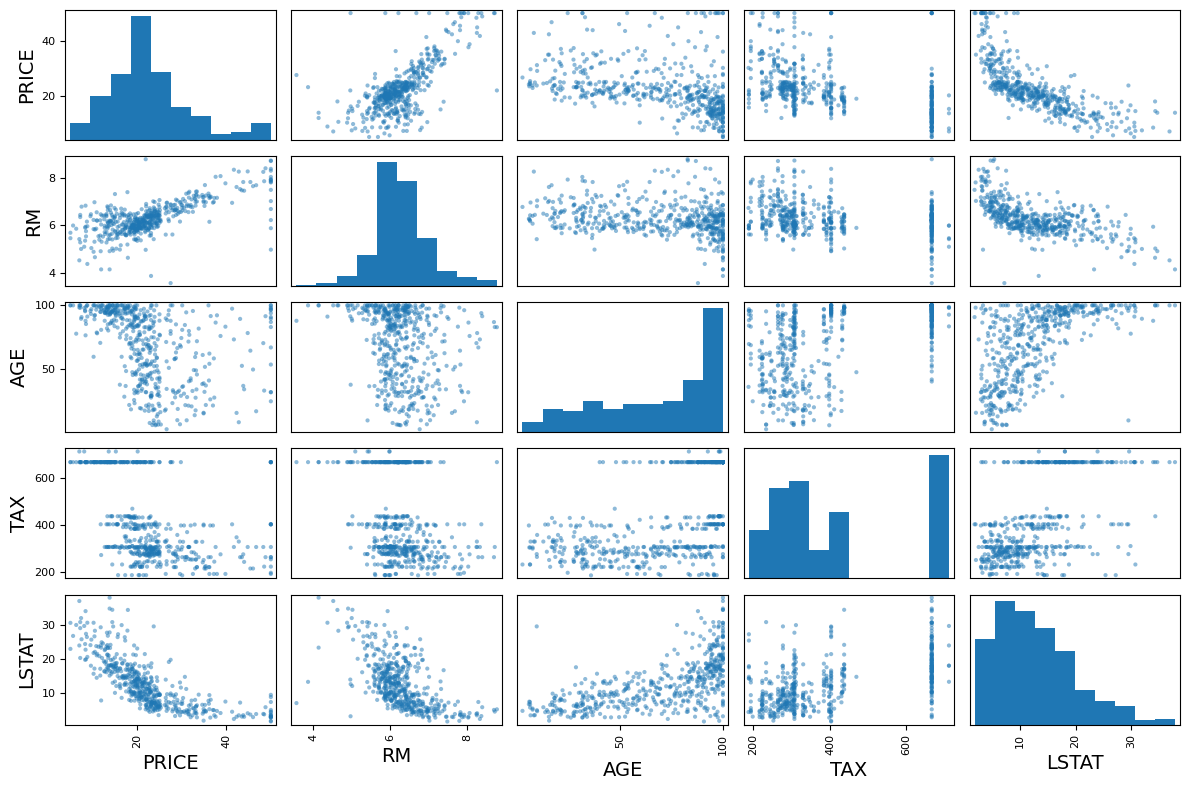

In [ ]:
#@ Correlations using Scatter matrix for Boston Housing
from pandas.plotting import scatter_matrix

# Select attributes that are most correlated with price
attributes = ["PRICE", "RM", "AGE", "TAX", "LSTAT"]
scatter_matrix(housing[attributes], figsize=(12, 8))

# Saving the figure
save_fig("Boston_Housing_Correlations")

# Displaying the plot
plt.show()

Saving Figure Median House Value vs Average Number of Rooms


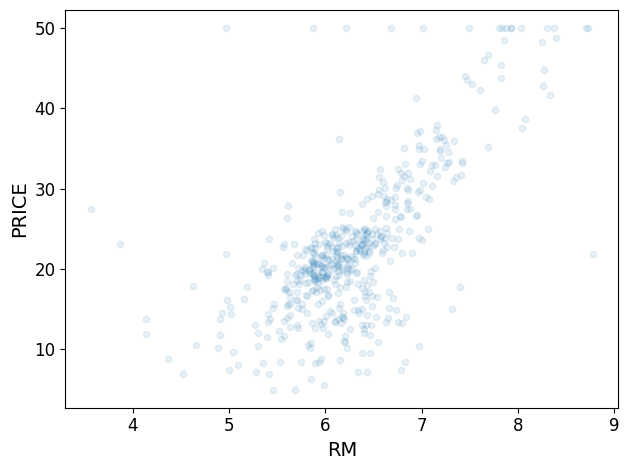

In [ ]:
#@ Correlations of Median House Value with Average Number of Rooms (RM)
housing.plot(kind="scatter", x="RM", y="PRICE", alpha=0.1)

# Saving the figure
save_fig("Median House Value vs Average Number of Rooms")

# Displaying the plot
plt.show()

In [ ]:
# Check the column names of the Boston dataset
print(housing.columns)


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE', 'income_cat'],
      dtype='object')


In [ ]:
#@ Attribute Combinations
# Create new features based on existing ones to capture more meaningful relationships
housing["rooms_per_household"] = housing["RM"] / housing["TAX"]   # Rooms per Household.
housing["bedrooms_per_room"] = housing["B"] / housing["RM"] # Bedrooms per Room.
housing["population_per_household"] = housing["LSTAT"] / housing["TAX"] # Population per Household.

#@ Inspecting the Correlations
# Compute and display the correlation matrix
corr_matrix = housing.corr()
print("Correlation matrix with 'PRICE':")
print(corr_matrix["PRICE"].sort_values(ascending=False))

#@ Inspecting the Data
# Show basic statistics of the dataset
print("\nBasic Statistics of the Dataset:")
print(housing.describe())


Correlation matrix with 'PRICE':
PRICE                       1.000000
RM                          0.695360
rooms_per_household         0.625102
ZN                          0.360445
B                           0.333461
DIS                         0.249929
CHAS                        0.175260
bedrooms_per_room           0.040120
AGE                        -0.376955
RAD                        -0.381626
CRIM                       -0.388305
population_per_household   -0.425177
NOX                        -0.427321
TAX                        -0.468536
INDUS                      -0.483725
PTRATIO                    -0.507787
LSTAT                      -0.737663
income_cat                 -0.777009
Name: PRICE, dtype: float64

Basic Statistics of the Dataset:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634

In [ ]:
#@ Preparing the Data for Machine Learning:
# Drop the labels (target variable) from the training set
housing = strat_train_set.drop("PRICE", axis=1)                   # Drop the target label 'PRICE' from Training set.
housing_labels = strat_train_set["PRICE"].copy()                  # Copy the target label 'PRICE' to housing_labels.

In [ ]:
#@ Working on missing values:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
IPython.display.display(sample_incomplete_rows)  # Inspecting the missing values.

# Dropping rows with missing values in 'LSTAT' (or any other attribute you're concerned about)
sample_incomplete_rows.dropna(subset=["LSTAT"], inplace=True)  # Dropping rows where 'LSTAT' has missing values.

# Dropping the whole 'LSTAT' column (or any column with missing values if necessary)
sample_incomplete_rows.drop("LSTAT", axis=1, inplace=True)  # Dropping the entire 'LSTAT' column.

# Imputing missing values in 'CRIM' (or any other column) with the median of the column
median = housing["CRIM"].median()  # Calculating the median of 'CRIM' (you can replace it with the appropriate column).
sample_incomplete_rows["CRIM"].fillna(median, inplace=True)  # Imputing the median value for missing 'CRIM' values.

print("\n")
IPython.display.display(sample_incomplete_rows)  # Display the updated data.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT


<ipython-input-34-4cef2501caef>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sample_incomplete_rows["CRIM"].fillna(median, inplace=True)  # Imputing the median value for missing 'CRIM' values.


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B


In [ ]:
#@ Missing Data for Boston Housing:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")  # Instantiating the Imputer.

# Dropping the non-numeric attribute ('CHAS', 'ocean_proximity', or other non-numeric columns if present)
housing_num = housing.drop("CHAS", axis=1)  # Drop 'CHAS' (or any non-numeric column) from the dataset.

# Fitting the Imputer instance to the Training Data
imputer.fit(housing_num)  # Fitting the imputer to the dataset
print(imputer.statistics_)  # Inspecting the values the imputer will use for missing values

# Inspecting the median values
print(housing_num.median().values)  # Displaying the median values

# Transforming the Training set with trained imputer
X = imputer.transform(housing_num)  # Applying imputation to the dataset

# Creating a new DataFrame from the transformed data
housing_imputed = pd.DataFrame(X, columns=housing_num.columns)  # Creating the DataFrame with imputed values
print("\n")
IPython.display.display(housing_imputed.head())  # Displaying the first few rows of the imputed data

[2.61390e-01 0.00000e+00 9.12500e+00 5.38000e-01 6.21100e+00 7.77000e+01
 3.26745e+00 5.00000e+00 3.30000e+02 1.91000e+01 3.91340e+02 1.11700e+01]
[2.61390e-01 0.00000e+00 9.12500e+00 5.38000e-01 6.21100e+00 7.77000e+01
 3.26745e+00 5.00000e+00 3.30000e+02 1.91000e+01 3.91340e+02 1.11700e+01]




,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,5.73116,0.0,18.10,0.532,7.061,77.0,3.4106,24.0,666.0,20.2,395.28,7.01
1,0.02055,85.0,0.74,0.410,6.383,35.7,9.1876,2.0,313.0,17.3,396.90,5.77
2,0.54011,20.0,3.97,0.647,7.203,81.8,2.1121,5.0,264.0,13.0,392.80,9.59
3,1.22358,0.0,19.58,0.605,6.943,97.4,1.8773,5.0,403.0,14.7,363.43,4.59
4,4.83567,0.0,18.10,0.583,5.905,53.2,3.1523,24.0,666.0,20.2,388.22,11.45


In [ ]:
#@ Handling Text and Categorical Attributes for Boston Housing:
from sklearn.preprocessing import OrdinalEncoder

# Assuming 'CHAS' is a categorical attribute indicating whether the property is near the Charles River
housing_cat = housing[["CHAS"]]  # Extract the 'CHAS' column (or any other categorical attribute)
print(housing_cat.head())  # Inspecting the Categorical attribute

# Instantiating the Encoder
ordinal_encoder = OrdinalEncoder()

# Encoding the Text (categorical data)
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

# Inspecting the Encoded Text
IPython.display.display(housing_cat_encoded[:10])  # Displaying the first 10 encoded values
print("\n")
print(ordinal_encoder.categories_)  # Inspecting the categories the encoder recognized

     CHAS
482   0.0
56    0.0
260   0.0
157   0.0
487   0.0


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.]])



[array([0., 1.])]


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import pandas as pd

# Assuming `housing` is already loaded and available

# Checking if 'PRICE' and 'LSTAT' exist in the dataset
print(housing.columns)  # Display all column names

# Drop 'PRICE' and 'LSTAT' columns only if they exist
if 'PRICE' in housing.columns and 'LSTAT' in housing.columns:
    housing_num = housing.drop(["PRICE", "LSTAT"], axis=1)  # Dropping 'PRICE' and 'LSTAT'
else:
    print("One or both of 'PRICE' and 'LSTAT' columns are missing.")
    housing_num = housing.copy()  # Continue without dropping if they are missing

# Proceed with transformation and pipeline if the columns were dropped successfully
attribute_adder = EnhancedAttributesAdder(add_bedrooms_per_room=True, add_rooms_per_household=True)

# Pipeline for Numerical attributes (Including Imputation, Transformation, and Scaling)
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),  # Handling missing values by median imputation
    ("attribs_adder", attribute_adder),             # Adding extra features through custom transformer
    ("std_scaler", StandardScaler())               # Standardizing the features
])

# Apply the pipeline transformation to the numerical attributes
housing_num_transformed = num_pipeline.fit_transform(housing_num)

# Inspecting the transformed data (first 10 rows)
print(housing_num_transformed[:10])  # Displaying the first 10 rows to inspect the result

# @ Inspecting the DataFrame:
print(housing.head())  # Previewing the first 5 rows of the dataset
print(housing.columns)  # Displaying the column names to ensure correct data

# Creating the DataFrame with transformed features
housing_transformed = pd.DataFrame(housing_num_transformed, columns=[
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT",
    "rooms_per_household", "population_per_household", "bedrooms_per_room", "age_by_rooms"
])

# Displaying the first few rows of the new DataFrame
print(housing_transformed.head())

# @ Checking if 'PRICE' exists in the DataFrame before dropping it
print(housing.columns)  # Display all column names

# Drop the 'PRICE' column (target variable) if it exists
if 'PRICE' in housing.columns:
    housing_num = housing.drop("PRICE", axis=1)  # Dropping 'PRICE' as it is the target variable
else:
    print("'PRICE' column not found in the DataFrame. Skipping drop operation.")
    housing_num = housing.copy()  # Proceed without dropping the 'PRICE' column

# List of numerical attributes (based on the features we are using for the Boston dataset)
num_attribs = list(housing_num)  # These would include the numerical columns such as RM, AGE, etc.

# Since the Boston dataset does not have categorical features, we'll focus on the numerical ones.
cat_attribs = []  # No categorical attributes in the Boston dataset for this example

# Define the transformation pipeline for numerical features
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),  # Impute missing values with the median
    ("attribs_adder", EnhancedAttributesAdder(add_bedrooms_per_room=True, add_rooms_per_household=True)),  # Add custom features
    ("std_scaler", StandardScaler())  # Standardize the data (scale the features)
])

# Create the ColumnTransformer pipeline
pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),  # Apply the num_pipeline to all the numerical features
    # You can add categorical transformations if necessary, e.g. for 'ocean_proximity', with one-hot encoding
    # ("cat", OneHotEncoder(), cat_attribs)  # Commented out since there are no categorical attributes in Boston dataset
])

# Apply the pipeline to the dataset (transform features without 'PRICE')
housing_prepared = pipeline.fit_transform(housing_num)

# Inspecting the prepared data (first 10 rows)
print(housing_prepared[:10])  # Displaying the first 10 rows
print(housing_prepared.shape)  # Shape of the transformed data


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')
One or both of 'PRICE' and 'LSTAT' columns are missing.
[[ 0.20487125 -0.50342694  1.02799974 -0.27808871 -0.18662826  1.06058863
   0.29528024 -0.18514314  1.624448    1.50267127  0.78604634  0.4255608
  -0.78548939 -0.2698034  -0.34810372 -0.58687409 -0.3652338 ]
 [-0.41899577  3.20597788 -1.51523442 -0.27808871 -1.26796905  0.123312
  -1.16529424  2.56745717 -0.87695426 -0.57396961 -0.5424763   0.44349476
  -0.95793135  0.20808875  0.83007721 -1.04017167  2.55226376]
 [-0.3622354   0.36937419 -1.0420405  -0.27808871  0.83266839  1.2568914
   0.46503224 -0.80384688 -0.53585395 -0.86222854 -2.51235468  0.39810635
  -0.42669885 -0.28980412 -0.45025597  0.00391571 -0.94422166]
 [-0.28756835 -0.50342694  1.24481924 -0.27808871  0.46040353  0.89746379
   1.01672623 -0.91572338 -0.53585395 -0.04451442 -1.73356555  0.07297029
  -1.12202935 -0.38183803 -0.4864

In [ ]:
#@ Training the Model:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()                                              # Instantiating the Model.
lin_reg.fit(housing_prepared, housing_labels)                             # Training the Linear Model.

#@ Inspecting the Model on few Instances:
some_data = housing.iloc[:5]
some_labels = housing_labels[:5]
some_prepared = pipeline.transform(some_data)
print(f"Predictions: {lin_reg.predict(some_prepared)}")                   # Inspecting the Predictions.
print(f"Labels: {list(some_labels)}")

#@ Inspecting the Errors:
print("\n")
from sklearn.metrics import mean_squared_error, mean_absolute_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)                                                            # Inspecting the root mean squared error.
lin_mae = mean_absolute_error(housing_labels, housing_predictions)
print(lin_mae)


Predictions: [29.42831829 23.72104173 31.98210146 31.97451272 20.58250772]
Labels: [25.0, 24.7, 33.8, 41.3, 20.6]


4.303706705607869
2.911299494654278


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Fit the Decision Tree Regressor on the transformed housing data
tree_reg = DecisionTreeRegressor(random_state=11)  # Instantiating the Model
tree_reg.fit(housing_prepared, housing_labels)  # Training the Model

# Making predictions using the trained model
housing_predictions = tree_reg.predict(housing_prepared)

# Calculating the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)

# Printing the RMSE
print(f"Root Mean Squared Error (RMSE) for Boston Housing Dataset: {tree_rmse}")

Root Mean Squared Error (RMSE) for Boston Housing Dataset: 0.0


In [ ]:
#@ Implementation of Cross Validation with Decision Trees for Boston Housing:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor
tree_reg = DecisionTreeRegressor(random_state=11)

# Perform Cross-validation (10-fold)
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

#@ Inspecting the Result:
def display_scores(scores):
  print(f"Scores: {scores}")
  print(f"Mean: {scores.mean()}")
  print(f"Standard Deviation: {scores.std()}")

# Displaying RMSE scores for Decision Tree
display_scores(tree_rmse_scores)

#@ Implementation of Cross Validation with Linear Regression for Boston Housing:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
lin_reg = LinearRegression()

# Perform Cross-validation (10-fold)
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

# Displaying RMSE scores for Linear Regression
display_scores(lin_rmse_scores)


Scores: [6.09720048 3.63609949 5.33675703 4.49053205 4.34824677 3.70462549
 4.63171135 3.48693992 6.82052051 5.34642404]
Mean: 4.789905711780767
Standard Deviation: 1.0467907886377381
Scores: [3.59034518 4.98576636 4.93637878 4.05808075 3.69091858 5.33780271
 3.95196548 4.33786601 7.09314844 3.4828838 ]
Mean: 4.546515610165727
Standard Deviation: 1.0425748164102167


In [ ]:
#@ Random Forest Regressor for Boston Housing:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Instantiate the Random Forest Regressor model
forest_reg = RandomForestRegressor(n_estimators=160, min_samples_leaf=3, n_jobs=-1, random_state=11)

# Train the model on the prepared housing data
forest_reg.fit(housing_prepared, housing_labels)

# Make predictions
housing_predictions = forest_reg.predict(housing_prepared)

# Calculate the Mean Squared Error and Root Mean Squared Error
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)

# Print RMSE for the Random Forest model
print(forest_rmse)

#@ Random Forest Regressor with Cross Validation for Boston Housing:
from sklearn.model_selection import cross_val_score

# Perform 10-fold Cross-validation for the Random Forest Regressor
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)

# Calculate RMSE for each fold and display the scores
forest_scores_rmse = np.sqrt(-forest_scores)
display_scores(forest_scores_rmse)

2.0111130608266894
Scores: [3.10953509 3.13524042 4.51051431 2.77207121 3.35189859 4.51292483
 3.09759532 2.9356702  5.62440215 2.61648092]
Mean: 3.566633303922476
Standard Deviation: 0.9281255724371047


In [ ]:
#@ Saving the Random Forest Model:
#import joblibfrom sklearn.externals import joblib
import joblib
joblib.dump(forest_reg, "ForestModel.pkl")

['ForestModel.pkl']

In [ ]:
#@ Grid Search and Tuning the Model for Boston Housing:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd

# Define the parameter grid for Random Forest Regressor
param_grid = [
    {"n_estimators": [30, 60, 90, 120], "max_features": [2, 3, 4]},
    {"bootstrap": [False], "n_estimators": [90, 120], "max_features": [2, 3, 4]}
]

# Instantiate the Random Forest Regressor model
forest_reg = RandomForestRegressor(random_state=11)

# Perform Grid Search with Cross-validation
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)

# Fit the model to the prepared Boston housing data
grid_search.fit(housing_prepared, housing_labels)

#@ Inspecting the Result:
print("Best Parameters:", grid_search.best_params_)
print("\nBest Estimator:", grid_search.best_estimator_)
print("\n")

#@ Inspecting the Scores:
cvresults = grid_search.cv_results_
for mean_score, params in zip(cvresults["mean_test_score"], cvresults["params"]):
    print(np.sqrt(-mean_score), params)
print("\n")

# Display the full GridSearchCV results
import IPython.display as display
display.display(pd.DataFrame(grid_search.cv_results_))


Best Parameters: {'bootstrap': False, 'max_features': 4, 'n_estimators': 120}

Best Estimator: RandomForestRegressor(bootstrap=False, max_features=4, n_estimators=120,
                      random_state=11)


3.8923349635909896 {'max_features': 2, 'n_estimators': 30}
3.755238974096324 {'max_features': 2, 'n_estimators': 60}
3.678793862593453 {'max_features': 2, 'n_estimators': 90}
3.6805909043337257 {'max_features': 2, 'n_estimators': 120}
3.747330754635423 {'max_features': 3, 'n_estimators': 30}
3.532436344840455 {'max_features': 3, 'n_estimators': 60}
3.5057244070245903 {'max_features': 3, 'n_estimators': 90}
3.53729467363575 {'max_features': 3, 'n_estimators': 120}
3.4742542056771404 {'max_features': 4, 'n_estimators': 30}
3.383421907960967 {'max_features': 4, 'n_estimators': 60}
3.40017429751852 {'max_features': 4, 'n_estimators': 90}
3.431836175862518 {'max_features': 4, 'n_estimators': 120}
3.446707342477277 {'bootstrap': False, 'max_features': 2, 'n_estimators': 90}
3.4601083185

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.057966,0.005289,0.005097,0.000927,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-15.579192,-11.631864,...,-15.150271,5.004362,18,-2.016995e+00,-2.084411e+00,-2.152263e+00,-2.580727e+00,-2.565753e+00,-2.280030e+00,2.432427e-01
1,0.107055,0.001476,0.008433,0.001056,2,60,NaN,"{'max_features': 2, 'n_estimators': 60}",-15.278193,-10.814607,...,-14.101820,4.571694,17,-2.116270e+00,-1.861191e+00,-1.969979e+00,-2.187189e+00,-2.263126e+00,-2.079551e+00,1.458224e-01
2,0.158516,0.004435,0.011861,0.002075,2,90,NaN,"{'max_features': 2, 'n_estimators': 90}",-13.934555,-11.009044,...,-13.533524,3.816314,14,-2.255723e+00,-2.034431e+00,-2.043981e+00,-2.222053e+00,-2.165063e+00,-2.144250e+00,9.058349e-02
3,0.216277,0.008360,0.014551,0.003065,2,120,NaN,"{'max_features': 2, 'n_estimators': 120}",-13.479673,-11.509611,...,-13.546749,3.723975,15,-2.101023e+00,-2.160609e+00,-2.079589e+00,-2.139961e+00,-2.191092e+00,-2.134455e+00,4.012483e-02
4,0.095170,0.009704,0.006447,0.000474,3,30,NaN,"{'max_features': 3, 'n_estimators': 30}",-13.219618,-8.524652,...,-14.042488,5.238316,16,-2.000729e+00,-2.083209e+00,-1.926600e+00,-2.396390e+00,-2.484125e+00,-2.178210e+00,2.213678e-01
5,0.176290,0.003857,0.011004,0.000823,3,60,NaN,"{'max_features': 3, 'n_estimators': 60}",-10.912500,-9.957728,...,-12.478107,3.166811,12,-1.787254e+00,-1.806680e+00,-1.828657e+00,-1.931533e+00,-2.067677e+00,-1.884360e+00,1.043042e-01
6,0.243441,0.047379,0.014222,0.003633,3,90,NaN,"{'max_features': 3, 'n_estimators': 90}",-10.299566,-10.080743,...,-12.290104,3.388130,11,-1.851077e+00,-1.976906e+00,-1.860703e+00,-1.919818e+00,-1.933360e+00,-1.908373e+00,4.692000e-02
7,0.241680,0.006934,0.014090,0.001122,3,120,NaN,"{'max_features': 3, 'n_estimators': 120}",-10.859652,-10.079057,...,-12.512454,3.443646,13,-1.859082e+00,-2.007062e+00,-1.852123e+00,-1.910382e+00,-1.956519e+00,-1.917034e+00,5.878815e-02
8,0.068492,0.003915,0.004446,0.000215,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-9.431927,-10.632074,...,-12.070442,3.325325,10,-1.966395e+00,-1.853581e+00,-1.901018e+00,-2.130852e+00,-2.149988e+00,-2.000367e+00,1.199859e-01
9,0.134918,0.002487,0.007860,0.000702,4,60,NaN,"{'max_features': 4, 'n_estimators': 60}",-8.869053,-10.276683,...,-11.447544,3.210140,5,-1.843032e+00,-1.708264e+00,-1.766176e+00,-1.883279e+00,-1.886643e+00,-1.817479e+00,6.975121e-02


In [ ]:
#@ Implementation of Randomized Search CV for Boston Housing:

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestRegressor

# Define the parameter distributions
param_distribs = {
    "n_estimators": randint(low=1, high=200),       # Number of estimators.
    "max_features": randint(low=1, high=10),        # Number of features to consider.
    "min_samples_leaf": randint(low=1, high=8)      # Minimum samples required in each leaf.
}

# Instantiate the Random Forest model
forest_reg = RandomForestRegressor(random_state=11)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(forest_reg, param_distribs, cv=5,
                                   n_iter=10, scoring="neg_mean_squared_error", random_state=11)

# Fit the RandomizedSearchCV model
random_search.fit(housing_prepared, housing_labels)

#@ Inspecting the Results:
# Best Hyperparameters
print("Best Hyperparameters: ", random_search.best_params_)
print("\n")

# Best Estimator
print("Best Estimator: ", random_search.best_estimator_)
print("\n")

# Inspecting the Scores from Cross-Validation
cv_results = random_search.cv_results_
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(f"RMSE: {np.sqrt(-mean_score)}, Parameters: {params}")
print("\n")

# Displaying the full results in a DataFrame
import IPython.display
IPython.display.display(pd.DataFrame(random_search.cv_results_))

Best Hyperparameters:  {'max_features': 9, 'min_samples_leaf': 1, 'n_estimators': 146}


Best Estimator:  RandomForestRegressor(max_features=9, n_estimators=146, random_state=11)


RMSE: 5.081223210781892, Parameters: {'max_features': 1, 'min_samples_leaf': 4, 'n_estimators': 82}
RMSE: 3.925510689041969, Parameters: {'max_features': 8, 'min_samples_leaf': 6, 'n_estimators': 77}
RMSE: 4.344107077674189, Parameters: {'max_features': 2, 'min_samples_leaf': 3, 'n_estimators': 25}
RMSE: 5.449648246775465, Parameters: {'max_features': 1, 'min_samples_leaf': 6, 'n_estimators': 161}
RMSE: 3.686810489921213, Parameters: {'max_features': 5, 'min_samples_leaf': 3, 'n_estimators': 141}
RMSE: 4.25862588494058, Parameters: {'max_features': 2, 'min_samples_leaf': 3, 'n_estimators': 38}
RMSE: 3.8809516922314207, Parameters: {'max_features': 6, 'min_samples_leaf': 5, 'n_estimators': 82}
RMSE: 3.3302844540848784, Parameters: {'max_features': 9, 'min_samples_leaf': 1, 'n_estimators': 146}
RMSE: 4.2678999

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.323180,0.136222,0.024031,0.013647,1,4,82,"{'max_features': 1, 'min_samples_leaf': 4, 'n_...",-25.442613,-19.140527,-20.832210,-25.120915,-38.557882,-25.818829,6.817304,9
1,0.470590,0.123145,0.022961,0.011330,8,6,77,"{'max_features': 8, 'min_samples_leaf': 6, 'n_...",-11.849017,-13.324163,-15.601418,-11.400848,-24.872725,-15.409634,4.953472,5
2,0.039657,0.002188,0.004036,0.000867,2,3,25,"{'max_features': 2, 'min_samples_leaf': 3, 'n_...",-18.700576,-13.944354,-15.186498,-14.989031,-31.535872,-18.871266,6.532153,8
3,0.440349,0.082216,0.035145,0.008266,1,6,161,"{'max_features': 1, 'min_samples_leaf': 6, 'n_...",-29.173998,-22.437888,-23.264768,-31.023979,-42.592697,-29.698666,7.244332,10
4,0.501575,0.042722,0.031278,0.002924,5,3,141,"{'max_features': 5, 'min_samples_leaf': 3, 'n_...",-11.403850,-10.411989,-14.167585,-9.845235,-22.134199,-13.592572,4.521928,2
5,0.105664,0.010419,0.014941,0.010057,2,3,38,"{'max_features': 2, 'min_samples_leaf': 3, 'n_...",-17.661444,-13.307723,-15.596622,-14.594465,-29.519218,-18.135894,5.866959,6
6,0.748794,0.291983,0.035780,0.017434,6,5,82,"{'max_features': 6, 'min_samples_leaf': 5, 'n_...",-11.756864,-10.868286,-15.512516,-11.085086,-26.086178,-15.061786,5.763028,3
7,0.441019,0.005621,0.015863,0.000645,9,1,146,"{'max_features': 9, 'min_samples_leaf': 1, 'n_...",-9.341566,-10.943668,-11.677420,-8.596063,-14.895256,-11.090795,2.196506,1
8,0.270741,0.004694,0.018008,0.003602,4,7,172,"{'max_features': 4, 'min_samples_leaf': 7, 'n_...",-16.031156,-12.669706,-16.966167,-14.881665,-30.526157,-18.214970,6.320676,7
9,0.316979,0.008622,0.019805,0.002677,3,3,193,"{'max_features': 3, 'min_samples_leaf': 3, 'n_...",-13.709144,-11.354709,-14.634505,-11.643239,-24.682893,-15.204898,4.897027,4


In [ ]:
#@ Analyzing the Best Models and Errors for Boston Housing

# Extracting feature importances from the best estimator (using GridSearchCV results)
feature_importances = grid_search.best_estimator_.feature_importances_

# Extra attributes created through feature engineering
extra_attribs = ["rooms_per_household", "population_per_household", "bedrooms_per_room", "age_by_rooms"]

# Combining the numerical attributes with extra features
attributes = num_attribs + extra_attribs  # If you have categorical features, append cat_onehot_attribs as well

# Sorting the features by importance in descending order
sorted_features = sorted(zip(feature_importances, attributes), reverse=True)

# Displaying the sorted features and their importance
for importance, attribute in sorted_features:
    print(f"{attribute}: {importance}")

LSTAT: 0.2798678875092328
RM: 0.19963874078664592
bedrooms_per_room: 0.08318105726617192
age_by_rooms: 0.05470056557977594
NOX: 0.05233459730575252
CRIM: 0.050965587252645515
INDUS: 0.045790092971596974
rooms_per_household: 0.045071172571095414
DIS: 0.043592147349860395
PTRATIO: 0.0429271461146106
population_per_household: 0.03234019018362055
TAX: 0.02236729461502267
AGE: 0.015097026379406853
B: 0.014291389465451521
RAD: 0.00841463403691899
ZN: 0.006573226832084097
CHAS: 0.0028472437801073318


In [ ]:
print(housing.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Ensure 'housing' still contains the 'PRICE' column
train_set, test_set = train_test_split(strat_train_set, test_size=0.2, random_state=11)  # Use strat_train_set which has 'PRICE' column

# Separate features and target variable for training and testing
X_train = train_set.drop("PRICE", axis=1)  # Features for training (excluding 'PRICE')
y_train = train_set["PRICE"]               # Target for training (only 'PRICE')

X_test = test_set.drop("PRICE", axis=1)    # Features for testing (excluding 'PRICE')
y_test = test_set["PRICE"]                 # Target for testing (only 'PRICE')

# Apply the same pipeline to transform both training and test features
X_train_prepared = num_pipeline.fit_transform(X_train)  # Fit and transform on training data
X_test_prepared = num_pipeline.transform(X_test)       # Only transform on test data

# Train the model using the transformed training data
forest_reg = RandomForestRegressor(n_estimators=160, min_samples_leaf=3, n_jobs=-1, random_state=11)
forest_reg.fit(X_train_prepared, y_train)

# Make predictions on the test set
y_pred = forest_reg.predict(X_test_prepared)

# Evaluate the model using multiple metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Displaying the metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")


Mean Squared Error (MSE): 13.481612114392316
Root Mean Squared Error (RMSE): 3.6717314872403612
Mean Absolute Error (MAE): 2.449641976422068
R² Score: 0.8281373144865325


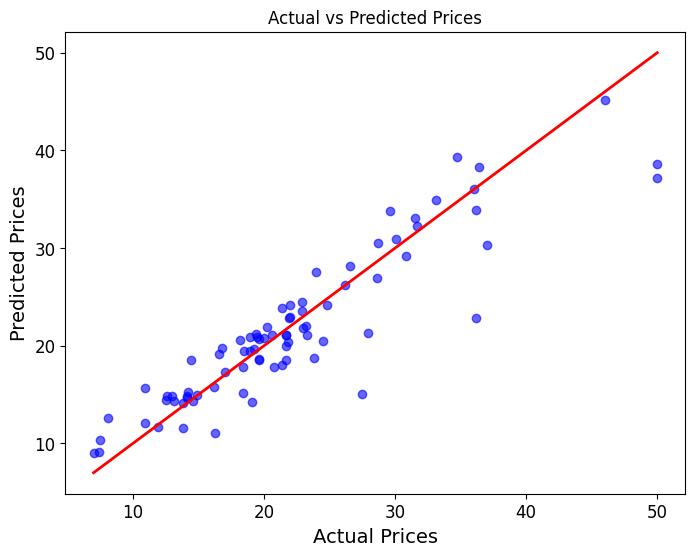

In [ ]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Line of perfect prediction
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


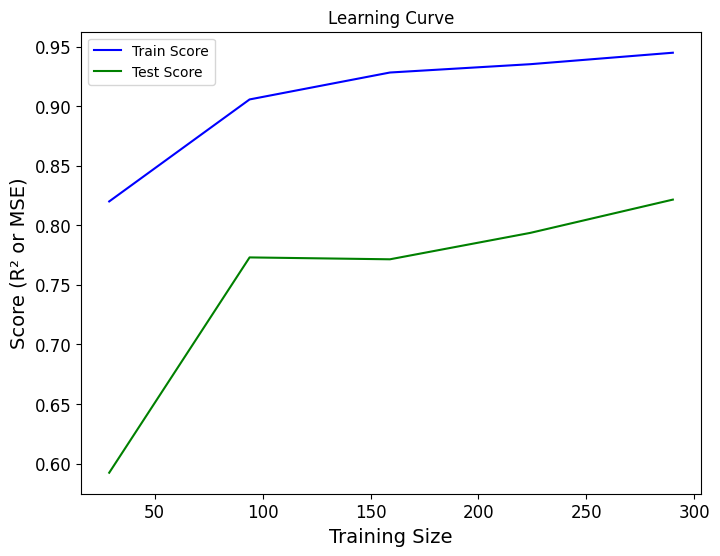

In [ ]:
from sklearn.model_selection import learning_curve

# Learning curve for RandomForestRegressor
train_sizes, train_scores, test_scores = learning_curve(forest_reg, X_train_prepared, y_train, cv=10)

# Plot Learning Curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Train Score', color='blue')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Test Score', color='green')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Score (R² or MSE)')
plt.legend()
plt.show()


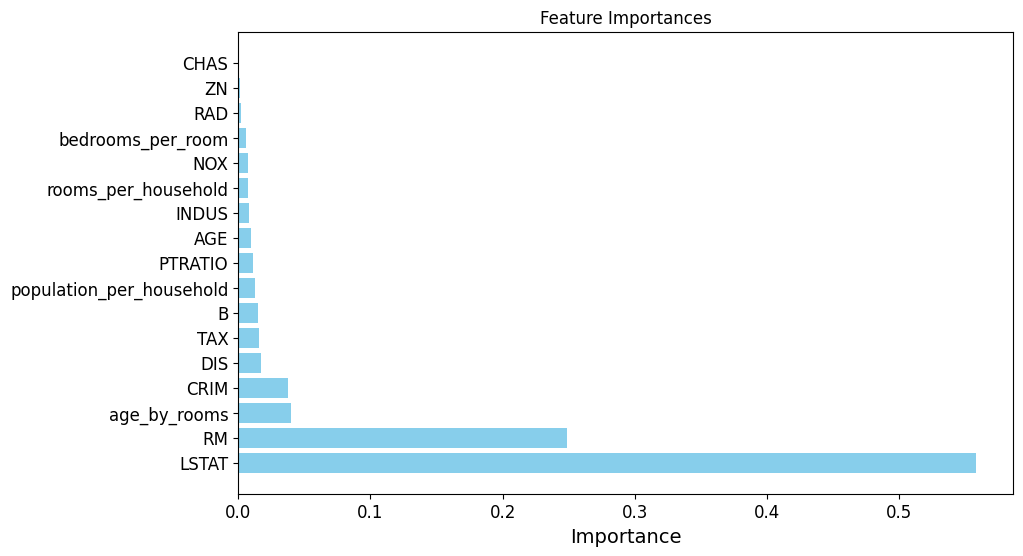

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Get the feature importances from the trained Random Forest model
importances = forest_reg.feature_importances_

# Create a list of feature names (based on the original features before transformation)
# The pipeline might transform the data, so we need to use the original features in the data
features = num_attribs + ["rooms_per_household", "population_per_household", "bedrooms_per_room", "age_by_rooms"]

# Create a DataFrame with feature names and their corresponding importance
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()